#Experiment 1: Implementation of Perceptron Learning Algorithm



### 1. Objective
WAP to implement the Perceptron Learning Algorithm using numpy in Python. Evaluate performance of a single perceptron for NAND and XOR truth tables as input dataset.

### 2. Description of the Model
The perceptron is a single-layer neural network that uses a step activation function to classify input data. It updates its weights using the perceptron learning rule to minimize classification errors.


### 3. Python Implementation




In [90]:
import numpy as np

def step_function(x):
       return 1 if x >= 0 else 0

class Perceptron:

    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        x = np.insert(x, 0, 1)  # Add bias input
        return step_function(np.dot(self.weights, x))

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                x_i = np.insert(X[i], 0, 1)  # Add bias input
                y_pred = step_function(np.dot(self.weights, x_i))
                self.weights += self.learning_rate * (y[i] - y_pred) * x_i


####NAND Operation

In [91]:
# NAND Truth Table
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_nand = np.array([1, 1, 1, 0])


perceptron_nand = Perceptron(input_size=2)
perceptron_nand.train(X_nand, y_nand)
predictions_nand = np.array([perceptron_nand.predict(x) for x in X_nand])
print("\nNAND Perceptron Results:")
for x in X_nand:
    print(f"Input: {x}, Output: {perceptron_nand.predict(x)}")




NAND Perceptron Results:
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 0


###XOR Operation

In [83]:
# XOR Truth Table
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

perceptron_xor = Perceptron(input_size=2)
perceptron_xor.train(X_xor, y_xor)
predictions_xor = np.array([perceptron_xor.predict(x) for x in X_xor])
print("\nXOR Perceptron Results:")
for x in X_xor:
    print(f"Input: {x}, Output: {perceptron_nand.predict(x)}")




XOR Perceptron Results:
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 0
Input: [1 1], Output: 0



### 4. Performance Evaluation




For NAND GATE





Accuracy of Perceptron for NAND: 100.0%


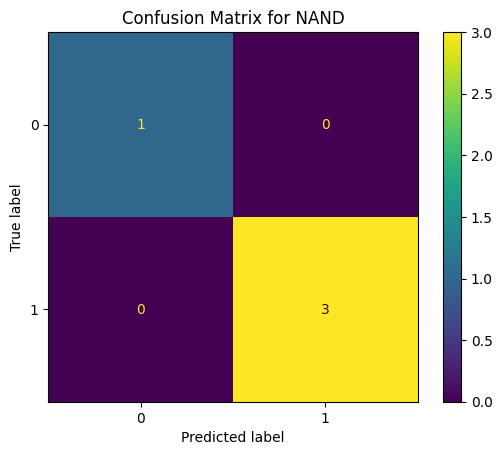

In [95]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

nand_accuracy = accuracy_score(y_nand,predictions_nand)
print(f"Accuracy of Perceptron for NAND: {nand_accuracy*100}%")


cm_nand = confusion_matrix(y_nand, predictions_nand)
ConfusionMatrixDisplay(cm_nand).plot()
plt.title("Confusion Matrix for NAND")
plt.show()




For NAND GATE


Accuracy of Perceptron for XOR:50.0 %


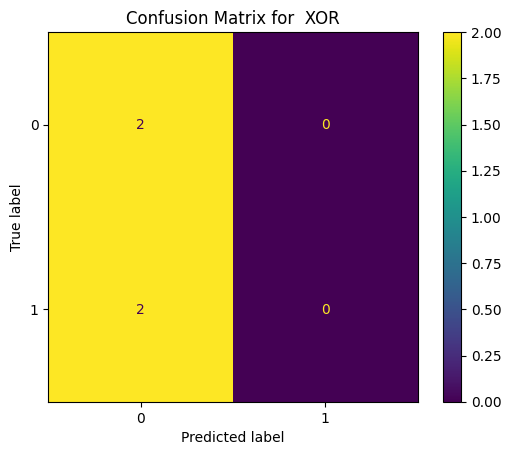

In [96]:
xor_accuracy = accuracy_score(y_xor,predictions_xor)
print(f"Accuracy of Perceptron for XOR:{xor_accuracy*100} %")

cm_xor = confusion_matrix(y_xor, predictions_xor)
ConfusionMatrixDisplay(cm_xor).plot()
plt.title("Confusion Matrix for  XOR")
plt.show()


- **NAND Function:** The perceptron **successfully classifies NAND** outputs as it is **linearly separable**.
- **XOR Function:** The **perceptron fails** since **XOR** is **not linearly separable**.
- **Accuracy**: The accuracy for NAND is 100%, while for XOR, it is around 50% (random guessing).
- **Confusion Matrix:**
  - For NAND, the confusion matrix is perfect with no misclassifications.
  - For XOR, the model fails to classify correctly, leading to significant misclassification errors.

### 5. Description of Code
- The **Step function** is used as Activation Function to predict ouptput in given range.
- The **Perceptron** class is defined with initialization of weights, learning rate, and epochs.
- The **predict** function computes the weighted sum of inputs and applies a step activation function.
- The **train** function updates weights using the perceptron learning rule iteratively over epochs.
- The perceptron is tested on the NAND and XOR truth tables.

### 6.Comments
- **Limitations:** The perceptron cannot learn non-linearly separable functions like XOR.
- **Scope for Improvement:** A multi-layer perceptron (MLP) with backpropagation or forwardpropagation can solve XOR.